In [2]:
import os
import sys

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

sys.path.append(os.path.join('..', '..'))
from tta_uia_segmentation.src.models.dino.DinoV2FeatureExtractor import DinoV2FeatureExtractor
from tta_uia_segmentation.src.dataset.dataset_in_memory import get_datasets
from tta_uia_segmentation.src.utils.io import load_config
from tta_uia_segmentation.src.utils.utils import torch_to_numpy
from tta_uia_segmentation.src.dataset.utils import onehot_to_class

plot_torch_img = lambda img_: plt.imshow(torch_to_numpy(img_.squeeze()), cmap='gray')
plot_torch_seg = lambda seg_: plt.imshow(torch_to_numpy(onehot_to_class(seg_).squeeze()), cmap='tab20', interpolation='none')

/scratch_net/biwidl319/jbermeo/GNN-Domain-Generalization-main/net_scratch/conda_envs/tta_uia_seg/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020201/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


# Load Dataset 

In [3]:
dataset_name = 'hcp_t1'
split = 'train'

dataset_cfg = load_config('../../config/datasets.yaml')
dataset_cfg = dataset_cfg[dataset_name]

In [4]:

(dataset,) = get_datasets(
    dataset_name    = dataset_name,
    splits          = [split],
    paths           = dataset_cfg['paths_processed'],
    paths_original  = dataset_cfg['paths_original'],
    image_size      = [1, 256, 256],
    resolution_proc = dataset_cfg['resolution_proc'],
    dim_proc        = dataset_cfg['dim'],
    n_classes       = dataset_cfg['n_classes'],
    load_original   = False,
    )


In [5]:
img, seg, *_ = dataset[120]
img = img.unsqueeze(0)
seg = seg.unsqueeze(0).float()

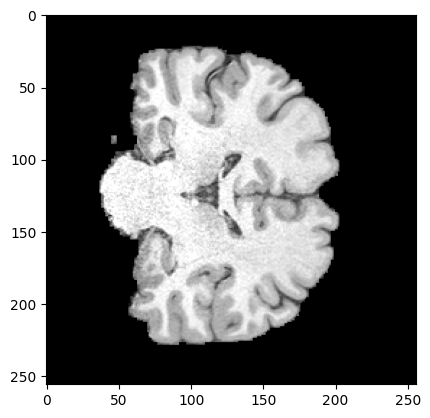

In [6]:
plot_torch_img(img)

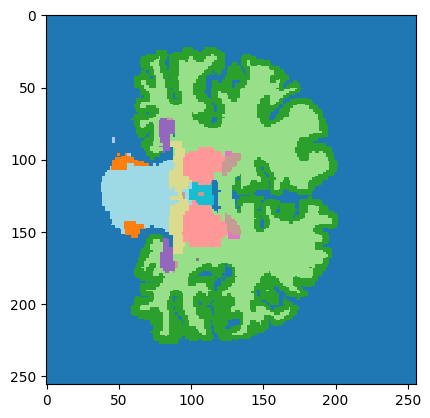

In [7]:
plot_torch_seg(seg)

# Check the outputs of Dino

In [14]:
img = img.repeat(1, 3, 1, 1)

In [8]:
dino_fe =DinoV2FeatureExtractor("small")

Using cache found in /home/jbermeo/.cache/torch/hub/facebookresearch_dinov2_main
/home/jbermeo/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/jbermeo/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/jbermeo/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


In [16]:
dino_output = dino_fe(img)

NotImplementedError: No operator found for `memory_efficient_attention_forward` with inputs:
     query       : shape=(1, 362, 6, 64) (torch.float32)
     key         : shape=(1, 362, 6, 64) (torch.float32)
     value       : shape=(1, 362, 6, 64) (torch.float32)
     attn_bias   : <class 'NoneType'>
     p           : 0.0
`decoderF` is not supported because:
    device=cpu (supported: {'cuda'})
    attn_bias type is <class 'NoneType'>
`flshattF@v2.3.2` is not supported because:
    device=cpu (supported: {'cuda'})
    dtype=torch.float32 (supported: {torch.float16, torch.bfloat16})
`tritonflashattF` is not supported because:
    device=cpu (supported: {'cuda'})
    dtype=torch.float32 (supported: {torch.float16, torch.bfloat16})
    operator wasn't built - see `python -m xformers.info` for more info
    triton is not available
`cutlassF` is not supported because:
    device=cpu (supported: {'cuda'})
`smallkF` is not supported because:
    max(query.shape[-1] != value.shape[-1]) > 32
    device=cpu (supported: {'cuda'})
    unsupported embed per head: 64